###   国内外实时疫情数据爬取

In [33]:
# 导入库
import time
import json
import requests
import pandas as pd
import openpyxl

####  国内疫情数据爬取及保存

In [35]:
# time.time()*1000 时间戳，改变时间戳参数，实现实时更新
url = "https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d"%int(time.time()*1000)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/87.0.4280.141 Safari/537.36 "
}
html = requests.get(url,headers=headers)
# html.text
# 类型转换
data = json.loads(html.json()['data'])
china_data = data['areaTree'][0]['children']
data_set = []

for i in china_data:
    data_dict={}
    # 省份名称
    data_dict['province'] = i['name'] 
    # 疫情数据
    # 现有确诊
    data_dict['nowConfirm'] = i['total']['nowConfirm']
    # 累计确诊
    data_dict['confirm'] = i['total']['confirm']
    # 累计死亡
    data_dict['dead'] = i['total']['dead']
    # 累计治愈
    data_dict['heal'] = i['total']['heal']
    # 死亡率
    data_dict['deadRate'] = i['total']['deadRate']
    # 治愈率
    data_dict['healRate'] = i['total']['healRate']
    data_set.append(data_dict)

In [103]:
df = pd.DataFrame(data_set)
df.head()
# 保存数据
# encoding="utf_8_sig" 中文乱码
df.to_csv(r'C:\Users\lenovo\Desktop\疫情数据分析\国内疫情数据.csv',index=0,encoding="utf_8_sig")

####  国外疫情数据爬取及保存

In [104]:
# https://view.inews.qq.com/g2/getOnsInfo?name=disease_foreign&callback=jQuery351010977315981159763_1611211378125&_=1611211378126
url = "https://view.inews.qq.com/g2/getOnsInfo?name=disease_foreign&callback=&_=%d"%int(time.time()*1000)
html = requests.get(url,headers=headers)
# html.text
# 类型转换
data = json.loads(html.json()['data'])
foreign_data = data['foreignList']
data_set = []
for i in foreign_data:
    data_dict={}
    # 国家
    data_dict['country'] = i['name'] 
    # 疫情数据
    # 现有确诊
    data_dict['nowConfirm'] = i['nowConfirm']
    # 累计确诊
    data_dict['confirm'] = i['confirm']
    # 累计死亡
    data_dict['dead'] = i['dead']
    # 累计治愈
    data_dict['heal'] = i['heal']
    data_set.append(data_dict)

In [105]:
df = pd.DataFrame(data_set)
df.head(30)
# 保存数据
df[:30].to_csv(r'C:\Users\lenovo\Desktop\疫情数据分析\国外疫情数据.csv',index=0,encoding="utf_8_sig")

###   疫情数据可视化
#### 国内疫情可视化

In [106]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Line,Bar,Pie

(-0.5, 1919.5, 1079.5, -0.5)

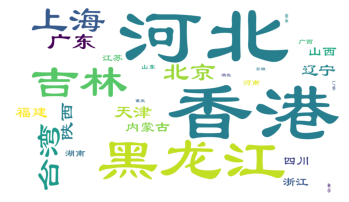

In [107]:
## 云图
df1 = pd.read_csv('国内疫情数据.csv')
word = [i[0] for i in df1[['province']].values]
value = [i[0] for i in df1[['nowConfirm']].values]
dict1= dict(zip(word, value))
# 字体设置
wordcloud = WordCloud(font_path="C:/Windows/Fonts/SIMLI.TTF",
                          background_color="white",
                               width=1920, height=1080)
# 根据现有确诊病例的数目生成词云
wordcloud.generate_from_frequencies(dict1)
# 保存词云
pic1 = wordcloud.to_file('wordcloud.png')
plt.imshow(pic1)
plt.axis("off")

In [108]:
df__1=df1.sort_values(by=['nowConfirm'],ascending=False)[:15]
data1 = [list(i) for i in zip(df__1['province'].values.tolist(),df__1['nowConfirm'].values.tolist())]
pie = (
    Pie()
    .add(
        "",
        data1,
        radius=["20%","60%"]
    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(orient="vertical",pos_top="50%",pos_left="80%"),
        title_opts=opts.TitleOpts(title="国内中高风险区域现有确诊人数",pos_top="5%")
   )

)
pie.render_notebook()

In [109]:
l1 = df__1['province'].values.tolist()
l2 = df__1['confirm'].values.tolist()
l3 = df__1['heal'].values.tolist()
bar = (
    Bar(init_opts=opts.InitOpts(
            animation_opts=opts.AnimationOpts(
                animation_delay=100, animation_easing="elasticOut"
            )
        ))
    .add_xaxis(l1)
    .add_yaxis("累计确诊人数", l2)
    .add_yaxis("累计治愈人数", l3)
    .set_global_opts(title_opts=opts.TitleOpts(title="国内中高风险区域累计确诊人数及治愈人数",pos_top="5%"))
     .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markpoint_opts=opts.MarkPointOpts( 
            data=[
                opts.MarkPointItem(type_="min", name="最小值"), #这个用线拉
                 ]
        ),
        markline_opts=opts.MarkLineOpts( 
            data=[
                opts.MarkLineItem(type_="max", name="最大值"), #这个点标注
            ]
        ),
    )
)
bar.render_notebook()

#### 世界疫情可视化

(-0.5, 1919.5, 1079.5, -0.5)

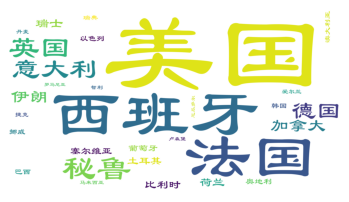

In [110]:
# 云图
df2 = pd.read_csv('国外疫情数据.csv')
word = [i[0] for i in df2[['country']].values]
value = [i[0] for i in df2[['nowConfirm']].values]
dict1= dict(zip(word, value))
# 字体设置
wordcloud = WordCloud(font_path="C:/Windows/Fonts/SIMLI.TTF",
                          background_color="white",
                               width=1920, height=1080)
# 根据现有确诊病例的数目生成词云
wordcloud.generate_from_frequencies(dict1)
# 保存词云
pic1 = wordcloud.to_file('wordcloud.png')
plt.imshow(pic1)
plt.axis("off")

In [111]:
df__2=df2.sort_values(by=['nowConfirm'],ascending=False)[:10]
df__2
data2 = [list(i) for i in zip(df__2['country'].values.tolist(),df__2['nowConfirm'].values.tolist())]
pie = (
    Pie()
    .add(
        "",
        data2,
        radius=["20%","60%"]
    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(orient="vertical",pos_top="50%",pos_left="80%"),
        title_opts=opts.TitleOpts(title="国外现有确诊人数最多的10个国家",pos_top="5%")
   )
)
pie.render_notebook()

In [112]:
l1 = df__2['country'].values.tolist()
l2 = df__2['confirm'].values.tolist()
l3 = df__2['heal'].values.tolist()
bar = (
   Bar(init_opts=opts.InitOpts(
            animation_opts=opts.AnimationOpts(
                animation_delay=100, animation_easing="elasticOut"
            )
        ))
    .add_xaxis(l1)
    .add_yaxis("累计确诊人数", l2)
    .add_yaxis("累计治愈人数", l3)
    .set_global_opts(title_opts=opts.TitleOpts(title="部分国家累计确诊人数及治愈人数"))
)
bar.render_notebook()


### 疫情最严重的的5个国家历史数据爬取

In [113]:
# 需要爬取的网址，爬取目前疫情确诊人数前5的国家
urlList = [
    # 美国疫情网址
    "https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E7%BE%8E%E5%9B%BD&",
    # 西班牙疫情网址
    "https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E8%A5%BF%E7%8F%AD%E7%89%99&",
    # 法国疫情网址
    "https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E6%B3%95%E5%9B%BD&",
    # 秘鲁疫情网址
    "https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E7%A7%98%E9%B2%81&",
    # 英国疫情网址
    "https://api.inews.qq.com/newsqa/v1/automation/foreign/daily/list?country=%E8%8B%B1%E5%9B%BD&",
]
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/87.0.4280.141 Safari/537.36 "
}
countryNameList = ["美国",
                   "西班牙",
                   "法国",
                   "秘鲁",
                   "英国"
                   ]

In [114]:
# 爬取数据并将数据进行保存
def dataSavedFunction(url):
    # 获取json文件并将文件转化为列表/字典格式
    response = requests.get(url, headers=headers)
    jsonResponse = response.json()
    # 遍历json处理后的数据并将相关数据添加到相应的空列表
    dataCollection = []
    for result in jsonResponse["data"]:
        dataCollection.append([
            result["date"],
            result["confirm"],
            result["dead"],
            result["heal"],
            result["confirm_add"]
        ])
    return dataCollection

In [115]:
# 将数据写入excel表格中
# 读入一个空白excel文件
wb = openpyxl.Workbook()
for name in countryNameList:
    wb_sheet = wb.create_sheet(name)
    wb_sheet.append(["date", "confirm", "dead", "heal", "confirm_add"])
    # 获取name的索引
    nameIndex = countryNameList.index(name)
    rows = dataSavedFunction(urlList[nameIndex])
    for j in rows:
        wb_sheet.append(j)
    # 保存相关文件内容
wb.save("疫情前5个国家历史数据.xlsx")
wb.close()

#### 美国2020年疫情可视化

In [116]:
data_USA = pd.read_excel(r'疫情前5个国家历史数据.xlsx', sheet_name = '美国')[:338]   # 2020年1月28日-12月31日的疫情数据 
l1 = data_USA['date'].values.tolist()
l2 = data_USA['confirm'].values.tolist()
l3 = data_USA['dead'].values.tolist()
l4 = data_USA['heal'].values.tolist()
n = len(l1)
l_1 = l1[0:n:10]
l_2 = l2[0:n:10]
l_3 = l3[0:n:10]
l_4 = l4[0:n:10]

In [117]:
bar = (
    Bar(init_opts=opts.InitOpts(width="1200px", height="500px")) #设置柱形图长宽
    .add_xaxis(xaxis_data=l_1)
    .add_yaxis(
        series_name="累计确诊",
        y_axis=l_2,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="累计死亡",
        y_axis=l_3,
        label_opts=opts.LabelOpts(is_show=False),
    )
     .add_yaxis(
        series_name="累计治愈",
        y_axis=l_4,
        label_opts=opts.LabelOpts(is_show=False),
    )

    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
        ),

    )
    .set_global_opts(title_opts=opts.TitleOpts(title="美国2020年疫情变化"))
)
bar.render_notebook()

#### 美国疫情预测
##### 采用最小二乘法对美国疫情历史数据拟合，并预测2021年1月10日的累计感染人数

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

In [119]:
# 读取美国2020年1月28日-12月31日的疫情数据 
data1 = pd.read_excel(r'疫情前5个国家历史数据.xlsx', sheet_name = '美国')[:338]

In [120]:
# 定义G矩阵
def G_matrix(X,n):
    G=[]
    for i in range(len(X)):
        data=[]
        for j in range(n+1):
            a=(X[i])**(j)
            data.append(a)
        G.append(data)
    return np.array(G)

In [121]:
# 正交化方法求解拟合系数LSS（正交化方法）
def LSS_3(G_Y):
    G_new = G_Y
    n = G_new.shape[1] - 1
    m = G_new.shape[0]
    for k in range(0, n):
        sgn = np.sign(G_new[k, k])
        sum_s = 0
        for i in range(k, len(X)):
            sum_s += G_new[i, k] ** 2
        sigma = -sgn * (sum_s ** (1 / 2))
        W = []
        w = G_new[k, k] - sigma
        W.append(w)
        for i in range(k + 1, len(X)):
            W.append(G_new[i, k])
        W = np.matrix(W).reshape(-1, 1)
        beta = sigma * W[0]
        I = np.eye(len(X) - k)
        Q_k = I + np.matmul(W, W.T) / beta
        G_Y_ = G_new[k:, k:]
        G_new[k:, k:] = np.matmul(Q_k, G_Y_)
    x = np.zeros(n)
    x[n - 1] = G_new[n - 1, n] / G_new[n - 1, n - 1]
    for i in range(n - 2, -1, -1):
        gs = 0
        for j in range(i + 1, n):
            gs += G_new[i, j] * x[j]
        x[i] = (G_new[i, n] - gs) / G_new[i, i]
    ro = 0
    for i in range(n, m):
        ro += G_new[i, n] ** 2
    return x, ro

In [122]:
# 定义拟合函数
def nihe(n, X, Y, date, date1):
    plt.figure()
    G = G_matrix(X, n)
    G_Y = np.hstack((G, Y))
    a, ro = LSS_3(G_Y)
    x_test = np.arange(1, date + 1, dtype=np.float64)
    y_test = []
    for xx in x_test:
        y_ = 0
        for j, ax in enumerate(a):
            y_ += ax * (xx ** (j))
        y_test.append(y_)
        if xx == date1:
            data1num = y_
    y_test = np.array(y_test, dtype=np.float64)
    plt.plot(x_test, y_test, color='r')
    x = X
    y = Y
    plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
    plt.rcParams['axes.unicode_minus']=False   #解决负号“-”显示为方块的问题
    plt.plot(x, y, color='b')
    plt.xlabel('天数')
    plt.ylabel('确认感染人数')
    plt.title('拟合曲线')
    plt.legend(['拟合曲线', '原数据'])
    return a, ro, data1num

拟合系数：[ 5.26782817e+05 -9.05065047e+04  3.65485374e+03 -5.97888766e+01
  5.04470209e-01 -2.20464495e-03  4.75384517e-06 -3.97881945e-09]
拟合误差：8982526866416.773
到2021年1月10日美国累计感染人数：22586224.708694935


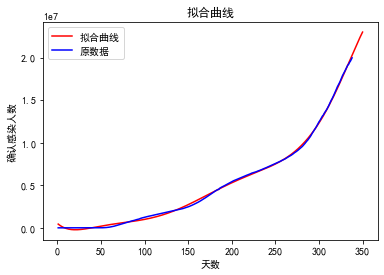

In [123]:
# 调用函数，预测2021年1月10日美国累计确诊人数
X = np.arange(1, len(data1.date) + 1, dtype=np.float64)
Y = np.array(data1.confirm, dtype=np.float64)
Y = Y.reshape(-1, 1)
a,ee,data1num=nihe(7, X, Y, 350, 348)
print('拟合系数：{}\n拟合误差：{}\n到2021年1月10日美国累计感染人数：{}'.format(a,ee,data1num))
plt.show()

In [124]:
# 2021年1月10日美国实际累计感染人数为22699938
rel_num = 22699938
acc = data1num/rel_num
print('预测准确率为：{}\n'.format(acc))

预测准确率为：0.9949905902251774

